# **4.2 FAST and ORB**

The Harris corner detector has been employed in a vast amount of works since its proposal back in 1988 and it's still being used in many approaches because of its simplicity and performance. However, the computer vision community has obviously moved on in recent years and nowadays is being focused in using faster methods to detect corners. One of the most successful and popular methods for detecting corners is called **FAST** (**F**eatures from **A**ccelerated **S**egment **T**est), which, as its name suggests, is clearly faster than most of the methods developed so far. [Published in 2006](https://link.springer.com/chapter/10.1007/11744023_34), the work by Rosten and Drummond claims to operate around 20x faster than the Harris method and finds a considerably large amount of keypoints (sometimes too much!).

In a nutshell, in its original form, it operates by comparing the grey level of a certain pixel in the image with a surrounding circle of 16 pixels. If at least 12 consecutive pixels in that circle are brighter (or darker) than the candidate, then it is a considered as a corner. Being based just in pixel comparisons, you can imagine its speed!

<center>
<img src="https://raw.githubusercontent.com/famoreno/cv_jn_images/master/ch4/insert/fast.png" width="500">
</center>

In fact, by wisely selecting the first 4 pixels to compare, fast rejection of possible candidates can be easily applied. Some variations of the original proposal have been developed later, turning the FAST-based approaches a prominent method for detecting corners nowadays.

However, this method **does not provide a descriptor** for the detected corners, so, as we learnt before, they must be augmented with a descriptor in order to be matched! We could use again NCC and a patch, but in this case we are going to explore **the ORB method**, which is [a detection and description method](https://ieeexplore.ieee.org/abstract/document/6126544) developed in 2011 by Rublee *et.al*.

ORB stands for **O**riented FAST and **R**otated **B**RIEF and combines the FAST detector with a modified version of the [BRIEF descriptor](https://link.springer.com/chapter/10.1007/978-3-642-15561-1_56). In short, ORB operates as follows:

- It detects FAST corners and computes its main orientation. 
- It rotates the sourrounding patch of the keypoint according to the main orientation.
- It computes the BRIEF descriptor by comparing the grey level in a set of wisely selected pairs of pixels within the (rotated) patch, yielding a **binary** sequence that corresponds to the descriptor. 

Since the resulting descriptors are binary (i.e. sequences of bits), they can be easily compared by using the so-called [Hamming distance](https://en.wikipedia.org/wiki/Hamming_distance), which, essentially, computes the number of different bits in the two descriptors.

**This notebook contains <font color=green>1 assignment</font> and <font color=blue>1 set of questions</font>**

In [1]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['figure.figsize'] = (20.0, 20.0)

images_path = '/gdrive/My Drive/Colab Notebooks/Chapter 4. Keypoint detection/images/'

## **<font color="green">ASSIGNMENT #1: Using ORB</font>**

Now let's try a simple example of using ORB. This time you will be less guided than in previous notebooks, and we will ask you to read the provided documentation.

> <font color="orange"> Have a look to the documentation regarding [ORB detection/description](https://docs.opencv.org/3.4/d1/d89/tutorial_py_orb.html) and [brute-force matching](https://opencv24-python-tutorials.readthedocs.io/en/latest/py_tutorials/py_feature2d/py_matcher/py_matcher.html) in OpenCV. </font>

Then, write a script that:
- Reads the images `park_l.jpeg` and `park_r.jpeg` in grayscale.
- Detect ORB keypoints.
- Compute their ORB descriptor.
- Use a **Brute-Force matcher** to find correspondences between both sets of keypoints. A Brute-Force matcher simply compares a certain descriptor in a list with all the rest of descriptors in an exhaustive search. Set the `crossCheck` argument to `True` in order to get more robust matches.
- Order the matches according to their distance (have a look to [`sorted()`](https://wiki.python.org/moin/HowTo/Sorting) and use as key the lambda function `x:x.distance`).
- Once all matches are defined and ordered, call `cv2.drawMatches` and display the resulting image with the 30 best matches. Try `cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS` as flag in this function call.



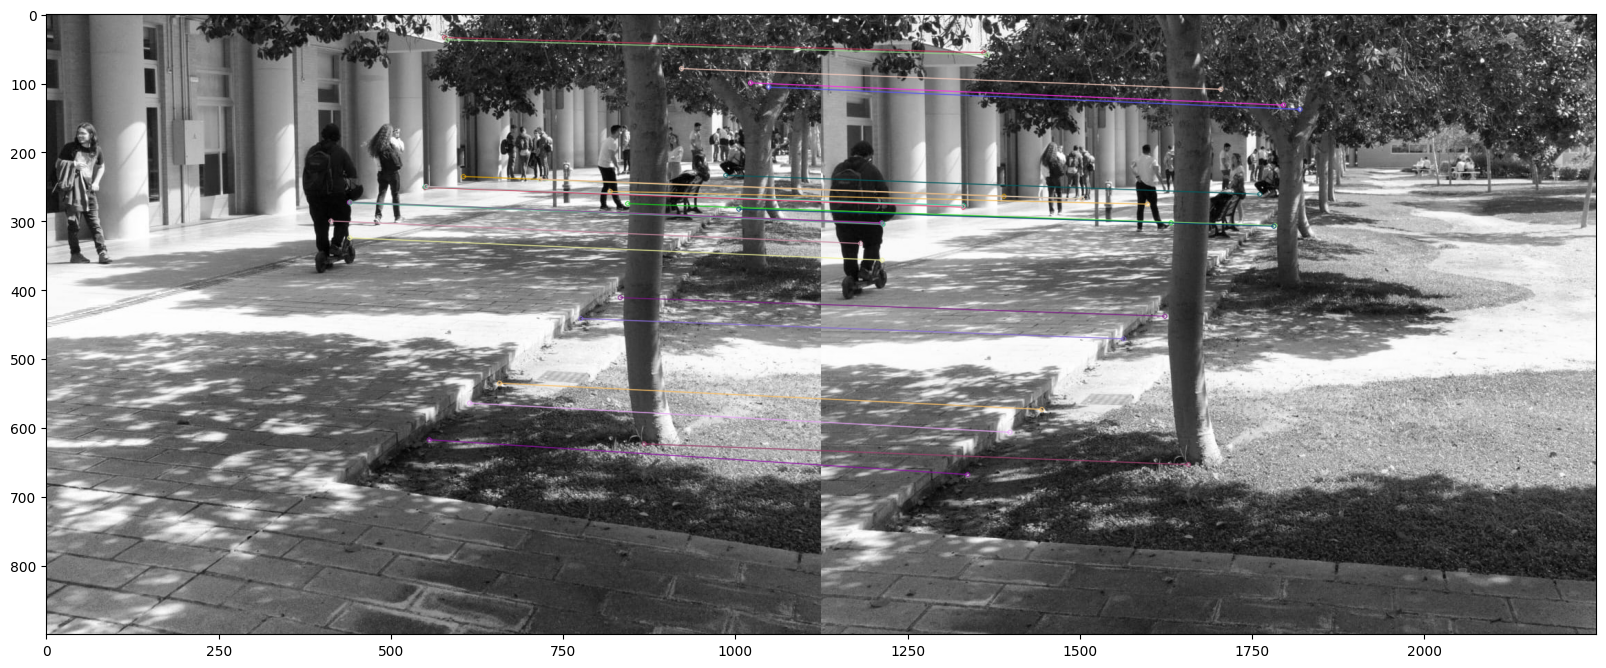

In [3]:
# Assignment #1
# - Detect and describe keypoints using ORB in two images ('park_l.jpeg' and 'park_r.jpeg')
# - Match them using a brute-force matcher
# - Order the matches according to their distance
# - Display the 30 best matches

# Write your code here
#Reads the images park_l.jpeg and park_r.jpeg in grayscale.
park_l = cv2.imread(images_path + 'park_l.jpeg',0)
park_r = cv2.imread(images_path + 'park_r.jpeg',0)

#Detect ORB keypoints
ORB = cv2.ORB_create()

kps_l = ORB.detect(park_l,None)
kps_r = ORB.detect(park_r,None)

#Compute their ORB descriptor
kps_l, desc_l = ORB.compute(park_l, kps_l)
kps_r, desc_r = ORB.compute(park_r, kps_r)

#Use Brute-Force matcher to find correspondences between both sets of keypoints
#Set the crossCheck argument to True in order to get more robust matches.
s_kps = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
matches = cv2.BFMatcher().knnMatch(desc_l, desc_r, k=2)
matches = s_kps.match(desc_l, desc_r)

#Order the matches according to their distance
matches = sorted(matches, key = lambda x:x.distance)

# display the resulting image with the 30 best matches
disp = cv2.drawMatches(park_l, kps_l, park_r, kps_r, matches[:30], np.asarray([]),flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

plt.imshow(disp, cmap='gray')





### **<font color=red><b>Expected output</b></font>**

<center>
<img src="https://raw.githubusercontent.com/famoreno/cv_jn_images/master/ch4/insert/ch42_a1_result.png" width="700">
</center>

### <font color="blue"><b>Discussion #1</b></font>

Now you can compare this output with the one produced by Harris + NCC...
- **What could you conclude?**

    <font color=blue><b>Although the ORB method is preferred for its invariance to rotations and scale changes, in the specific case presented where there are no rotations or translations, the results obtained by ORB may not be satisfactory, with several keypoints being incorrectly associated. In such a scenario, the Harrys + NCC method, despite lacking rotational and scale invariance, could potentially be a better option as it may provide improved results.</b></font>
    

## **Conclusion**

This was a short but intense notebook covering state-of-the-art keypoint detection and description techniques such as FAST and ORB. It is exciting to stay informed about modern techniques!